<a href="https://colab.research.google.com/github/George090872/Computer-Vision/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Detect keypoints in the 'building-1200by12002.tif' image using the SIFT feature detector. Your task is to complete the following:

    1- Filter the keypoints to only keep those with a size between 5 and 60.

    2- Print the number of keypoints detected and the number of keypoints remaining after filtering.

    3- Draw the filtered keypoints on the image and display the resulting image. (Make sure to show size of keypoint and it will even show its orientation)

Number of keypoints detected: 3423
Number of keypoints remaining after filtering: 306


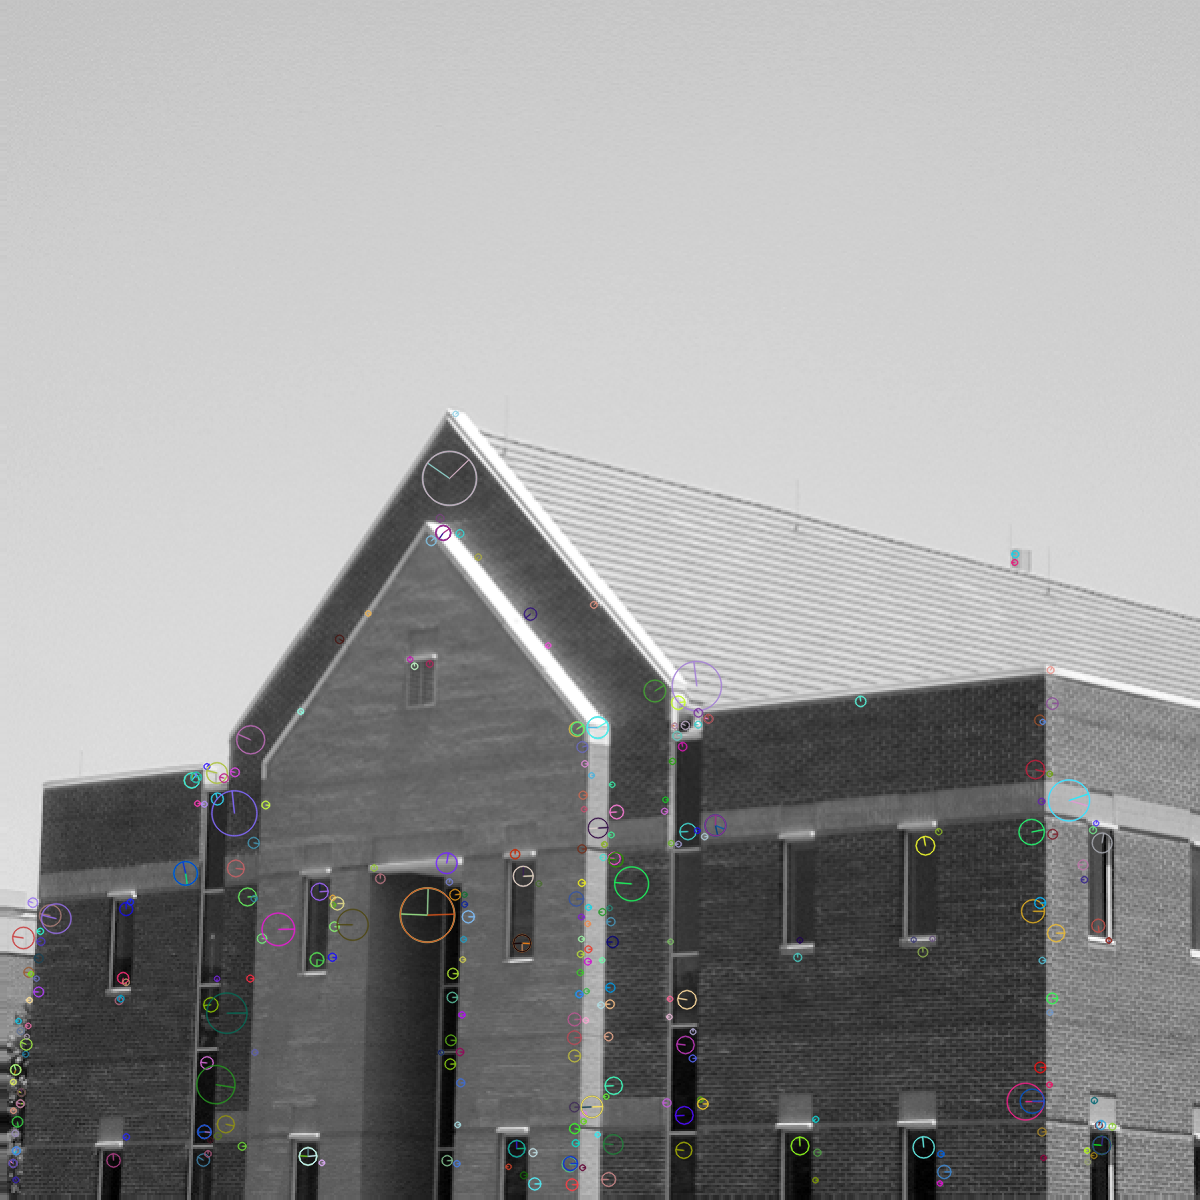

In [ ]:
!pip install opencv-python==4.7.0.72
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('building-1200by1200.tif')

  # Create a SIFT object
sift = cv2.SIFT_create()

  # Detect keypoints
kp = sift.detect(img, None)

  # Filter keypoints based on size
filtered_kp = [k for k in kp if 5 <= k.size <= 60]

print("Number of keypoints detected:", len(kp))
print("Number of keypoints remaining after filtering:", len(filtered_kp))

  # Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, filtered_kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  # Display the image
cv2_imshow(img_with_keypoints)

**Explanation:**The code loads an image, detects SIFT keypoints, filters them by size (keeping only those with sizes between 5 and 60), and then visualizes the filtered keypoints on the image. It also prints the total number of keypoints detected versus those remaining after filtering.


Compare the result of feature matching with or without applying ratio test and comment on your results.

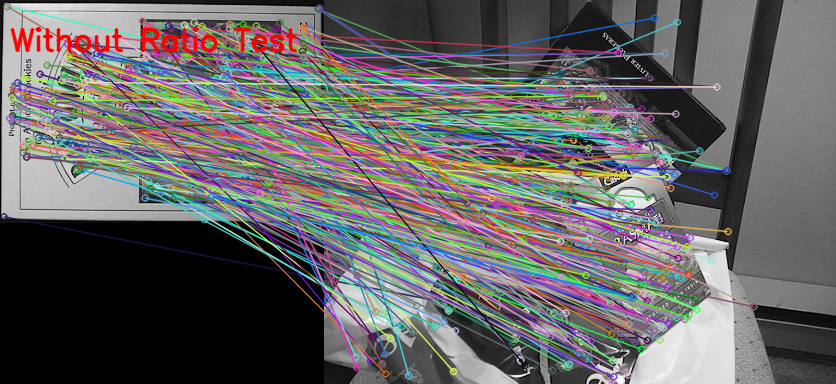

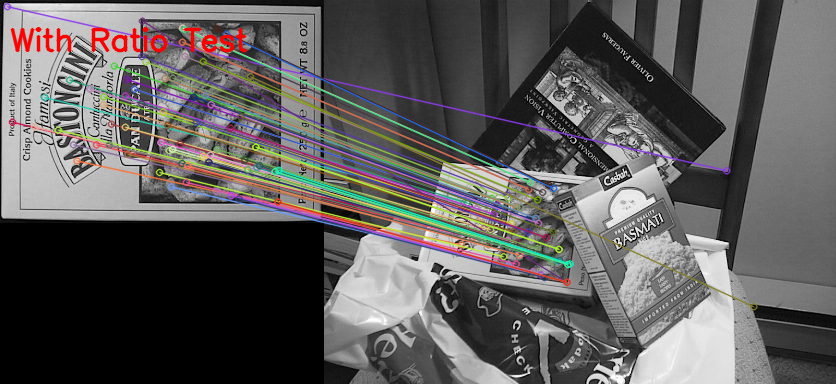

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load the images
img1 = cv2.imread('box.png')
img2 = cv2.imread('box_in_scene.png')
# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
# Create a Brute-Force Matcher object
bf = cv2.BFMatcher()

# Perform matching
matches = bf.match(des1, des2)

# Sort the matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
img_matches_without_ratio = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)

# Create a Brute-Force Matcher object
bf = cv2.BFMatcher()

# Perform k-NN matching (find the 2 best matches for each keypoint)
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Adjust the ratio threshold as needed
        good_matches.append([m])

# Draw the matches
img_matches_with_ratio = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_matches_without_ratio, 'Without Ratio Test', (10, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(img_matches_with_ratio, 'With Ratio Test', (10, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
cv2_imshow(img_matches_without_ratio)
cv2_imshow(img_matches_with_ratio)

**Comparison :**
Although the non-ratio test approach might show more matches, the quality of these matches is lower. The ratio test improves the quality of the result by eliminating many of the false or ambiguous correspondences, leading to more reliable feature matching, particularly in complex scenes or cluttered environments.


Using `face.jpg` and `smile.jpg` images.
    
    1. Use Brute-Force Matching to find the smile in a face, and apply the test ratio with ratio = 0.6. Display the matches.
    
    2. Use the good matches to draw a circle or a rectangle on the smile location in the face image

        Hint: you can use the following code to extract the locations of the good matches in the face image:
            good_match_pts = [kp1[m.queryIdx].pt for m in good_matches]


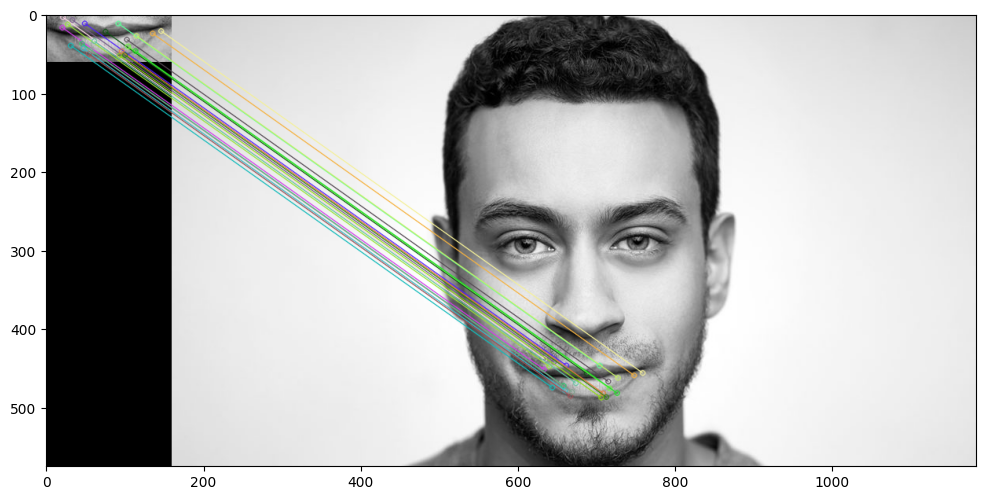

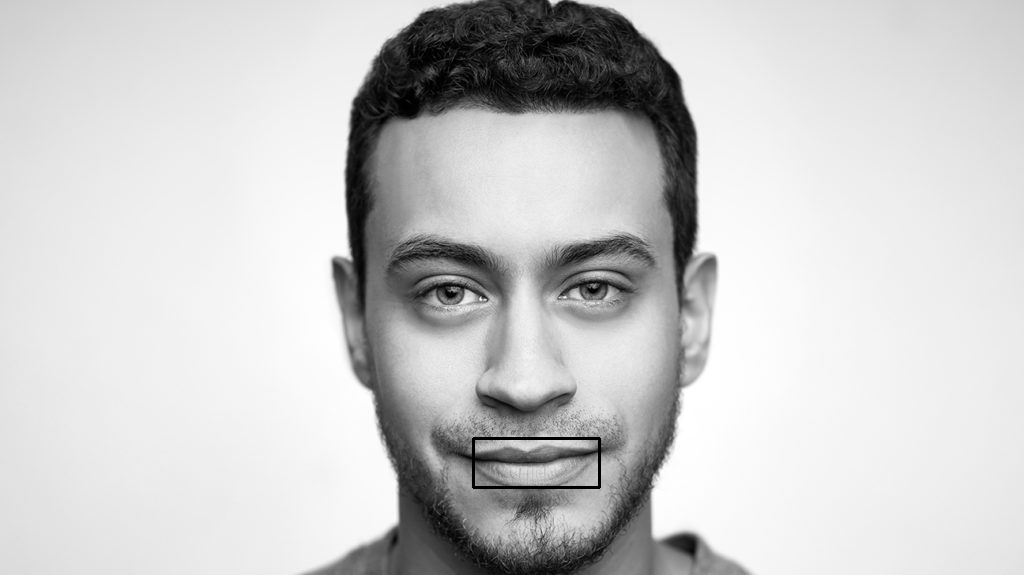

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Load the images
img1 = cv2.imread('smile.jpg', 0)  # queryImage
img2 = cv2.imread('face.jpg', 0)  # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Create BFMatcher object
bf = cv2.BFMatcher()

# Find k=2 best matches for each descriptor
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)

# Draw the matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Display the matches
plt.figure(figsize=(12, 8))
plt.imshow(img_matches)
plt.show()

# Extract locations of good matches in the face image
good_match_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches])

# Find the bounding box around the matched region
x_coords = [int(pt[0]) for pt in good_match_pts]
y_coords = [int(pt[1]) for pt in good_match_pts]

min_x = min(x_coords)
max_x = max(x_coords)
min_y = min(y_coords)
max_y = max(y_coords)

# Draw a rectangle on the face image
cv2.rectangle(img2, (min_x, min_y), (max_x, max_y), (0, 0, 255), 2)

# Display the face image with the rectangle around the smile
cv2_imshow(img2)

**Explanation:**The code uses SIFT to detect and match features between two images; a "smile" image and a "face" image. It applies a ratio test to filter matches, draws the good matches, and then computes a bounding box around the matched region in the face image, which is highlighted with a rectangle.

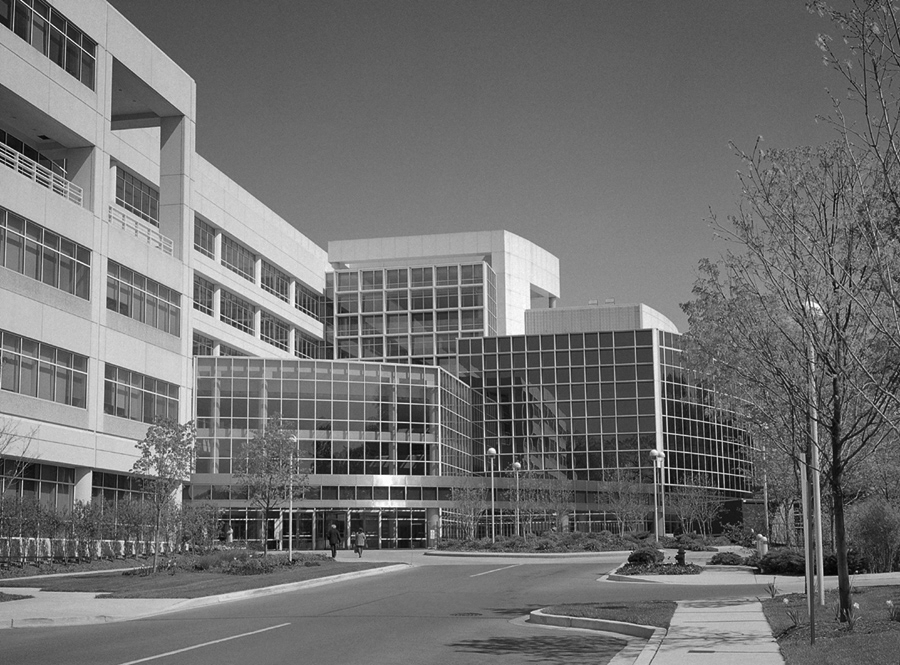

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('national-archives-bld.tif')

if img is not None:
  cv2_imshow(img)
else:
  print("Error: Could not open or read the image.")
